In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
import pandas as pd
#import dataset
df = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/train.zip')

#inspect dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
#inspect the types

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [4]:
#inspect last 5 rows
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [5]:
#check for any missing value
df.isna().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [6]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [8]:
from haversine import haversine

In [9]:
df['trip_distance'] = df.apply(lambda x: haversine((x.pickup_latitude,x.pickup_longitude),(x.dropoff_latitude,x.dropoff_longitude)),axis=1)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


In [10]:
#total number of trips
df['id'].count()

1458644

In [11]:
#unique vendors
df['vendor_id'].unique().shape[0]

2

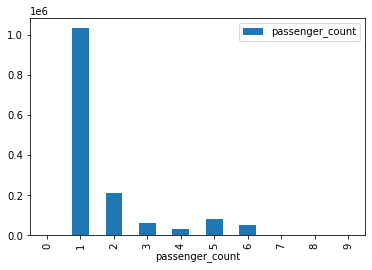

In [12]:
t = df.groupby('passenger_count')[['passenger_count']].count()
t.plot(kind='bar')

In [14]:
# - Early morning (4 hrs to 8 hrs)
# - Morning (8 hrs to 12 hrs) , 
# - Afternoon (12 hrs to 17 hrs) , 
# - Evening (17 hrs to  20 hrs),
# - Night (20 hrs to 0 hrs)
# - Mid night (0 hrs to 4hrs)


def period(a):
    if a in range(0,4):
        return 'Mid night'
    elif a in range(4,8):
        return "Early morning"
    elif a in range(8,12):
        return "Morning"
    elif a in range(12,17):
        return "Afternoon"
    elif a in range(17,20):
        return "Evening"
    else:
        return "Night"

df['dropoff_timezone'] = df.apply(lambda x: period(x['dropoff_datetime'].hour),axis=1)


In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Mid night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Afternoon


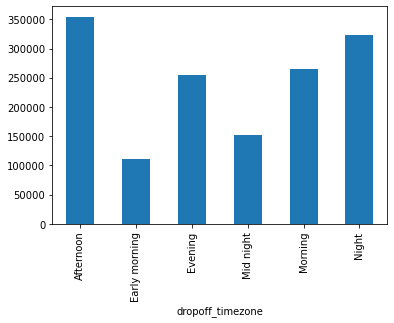

In [16]:
df.groupby('dropoff_timezone')['dropoff_timezone'].count().plot(kind='bar')

In [18]:
clean_df = df[df['trip_distance'] > 0.0]
clean_df = df[~df['trip_duration'].isin(df.nlargest(4,'trip_duration')['trip_duration'])]
clean_df.nlargest(50,'trip_distance')
clean_df.set_index('pickup_datetime')

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance,dropoff_timezone
pickup_datetime,,,,,,,,,,,,
2016-03-14 17:24:55,id2875421,2,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Evening
2016-06-12 00:43:35,id2377394,1,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Mid night
2016-01-19 11:35:24,id3858529,2,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,Afternoon
2016-04-06 19:32:31,id3504673,2,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500,Evening
2016-03-26 13:30:55,id2181028,2,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-08 13:31:04,id2376096,2,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082,Afternoon
2016-01-10 07:35:15,id1049543,1,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,Early morning
2016-04-22 06:57:41,id2304944,2,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,Early morning


## There is a relation between trip distance and trip duration
### long trip distance map to long trip duration

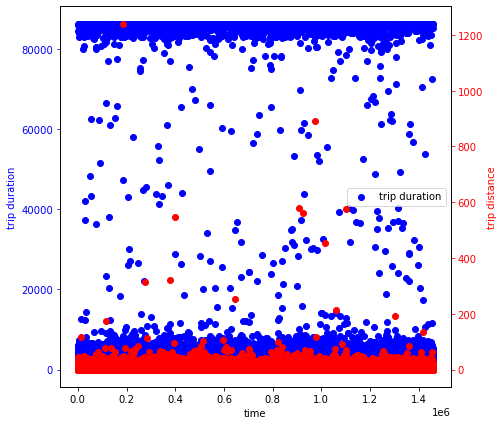

In [19]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

# ax.scatter(clean_df['trip_duration'],clean_df['trip_distance'],color='blue')
# ax.set_xlabel('trip distance')
# ax.set_ylabel('trip duration')
# ax.boxplot([clean_df['trip_duration']])

ax.scatter(clean_df.index,clean_df[['trip_duration']],color='blue',label='trip duration')
ax.set_ylabel('trip duration',color='blue')
ax.set_xlabel('time')
ax.tick_params('y', colors='blue')
ax.legend()
ax2 = ax.twinx()
ax2.scatter(clean_df.index,clean_df['trip_distance'],color='red',label='trip distance')
ax2.set_ylabel('trip distance',color='red')
ax2.tick_params('y',colors='red')
fig.set_size_inches(7,7)
plt.show()

## Total trips per day
#### January had lowest total trips in a day
#### January 23rd had lowest trips under 2000
#### June also had a noticeable drop in total trip with under 6000
#### most trips total fall in bracket of 9000 and 10000

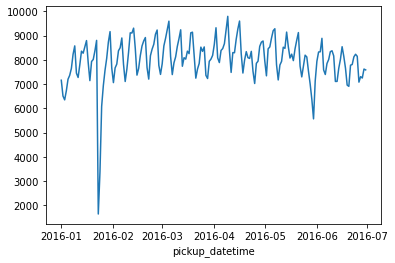

In [25]:
trip_per_day = df.groupby(df['pickup_datetime'].dt.date)['id'].count()
trip_per_day.plot(ylabel='total trips per day')

## Trip duration per day
#### most trips are in the range of 25000 to 30000
#### 23rd January had lowest duration with slightly above 5000
#### April had highest duration of trips
#### June to July had noticeable drop in trip duration

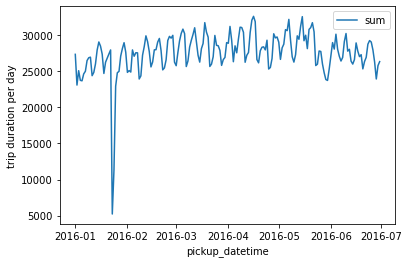

In [40]:
trip_duration_per_day = df.groupby(df['pickup_datetime'].dt.date)['trip_distance'].agg(['sum'])
trip_duration_per_day.plot(ylabel='trip duration per day')

### Analysis
#### April had highest number of passengers
#### January had lowest passengers, specifically 23rd January with 2787 passengers - a huge drop from a mean of 13340
#### high number of passengers in April maybe due to schools closed

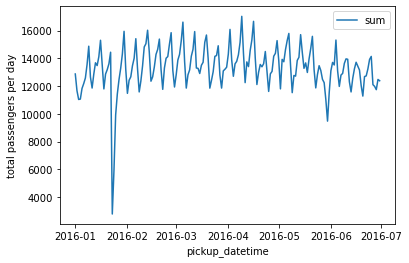

In [62]:
total_passengers_per_day = df.groupby(df['pickup_datetime'].dt.date)['passenger_count'].agg(['sum'])
total_passengers_per_day.plot(ylabel='total passengers per day')

In [32]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['pickup_longitude'], df['pickup_latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

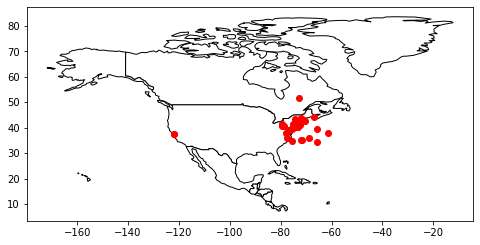

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black',figsize=(8, 8))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()